In [1]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

#loading the save numpy arrays in the previous code

In [2]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [3]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [9]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
170/170 [==============================] - 276s 2s/step - loss: 0.2442 - accuracy: 0.8952 - val_loss: 0.2791 - val_accuracy: 0.8728
Epoch 2/20
170/170 [==============================] - 273s 2s/step - loss: 0.2122 - accuracy: 0.9090 - val_loss: 0.2684 - val_accuracy: 0.8890
Epoch 3/20
170/170 [==============================] - 454s 3s/step - loss: 0.1884 - accuracy: 0.9237 - val_loss: 0.2805 - val_accuracy: 0.8846
Epoch 4/20
170/170 [==============================] - 448s 3s/step - loss: 0.1615 - accuracy: 0.9353 - val_loss: 0.2687 - val_accuracy: 0.8882
Epoch 5/20
170/170 [==============================] - 452s 3s/step - loss: 0.1459 - accuracy: 0.9421 - val_loss: 0.3355 - val_accuracy: 0.8618
Epoch 6/20
170/170 [==============================] - 444s 3s/step - loss: 0.1308 - accuracy: 0.9509 - val_loss: 0.2868 - val_accuracy: 0.8809
Epoch 7/20
170/170 [==============================] - 447s 3s/step - loss: 0.1029 - accuracy: 0.9610 - val_loss: 0.2609 - val_accuracy: 0.9044

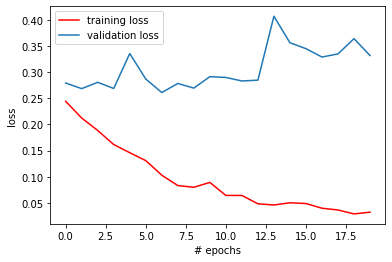

In [13]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

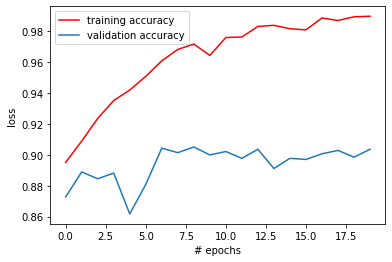

In [14]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [15]:
print(model.evaluate(test_data,test_target))

24/24 [==============================] - 9s 397ms/step - loss: 0.4051 - accuracy: 0.8849
[0.40505948662757874, 0.8849206566810608]
